# Retificador trifásico em ponte (Carga RC)

## <span style="color:red">ATENÇÃO: contém problemas no alpha e na corrente!</span>

$$
\sin(\theta)e^{\frac{-(\frac{2\pi}{3} + \alpha -\theta)}{\omega RC}} + \sin(\frac{2\pi}{3} + \alpha)= 0
$$

In [2]:
from funcoes import *
%run funcoes.py
%matplotlib inline

0.2494645512650462
# - Tensão na carga - # 
Vpk:	 70.71067811865476 
Vm: 	 121.2354181297138 
Vrms: 	 121.23887706614865
# - Corrente na fase - # 
Ipk: 	 50.37967723232452 
Im: 	 7.173914561054202e-15 
Irms: 	 20.1029698008109
# - Corrente no resistor - # 
Ipk: 	 1.2247448713915907 
Im: 	 1.2123541812971574 
Irms: 	 1.2123887706614802
# - Corrente no capacitor - # 
Ipk: 	 49.20022870292577 
Im: 	 11.41290977093703 
Irms: 	 24.061128392334897
# - Corrente de saída - # 
Ipk: 	 50.37967723232452 
Im: 	 12.625263961993532 
Irms: 	 24.657564215805927
# - Potências trifásicas - # 
Ppk:	 10330.947275951095 
P: 	 1522.7187317749704 
S: 	 3015.445470121635
# - Fatores - # 
FP:	 0.5049730618121733 
THD V:	 0.0018850159739448947 
THD I:	 1.6773541773653928


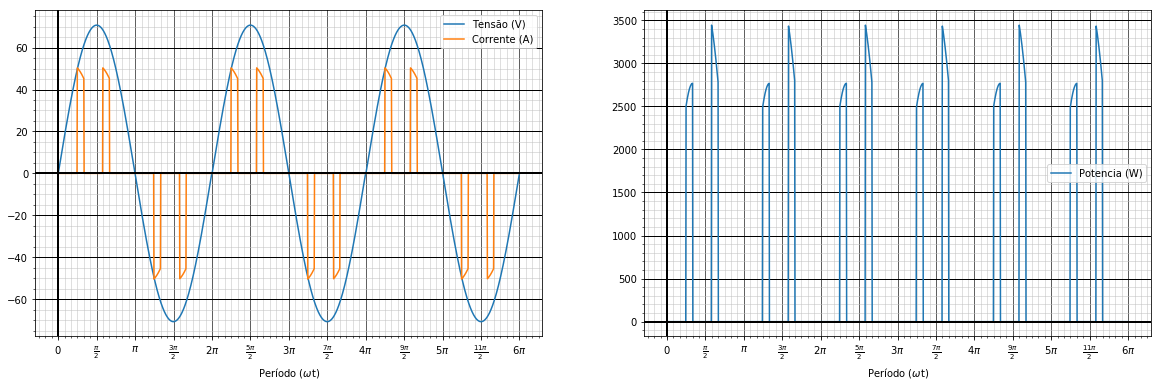

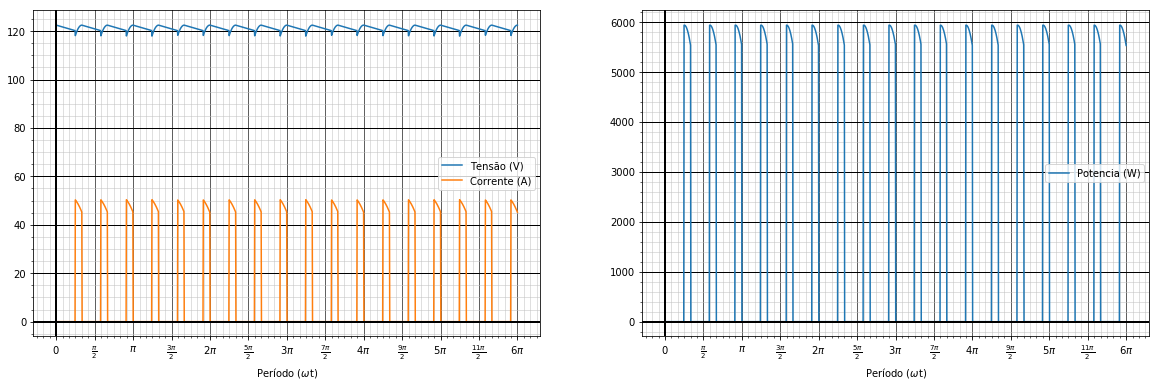

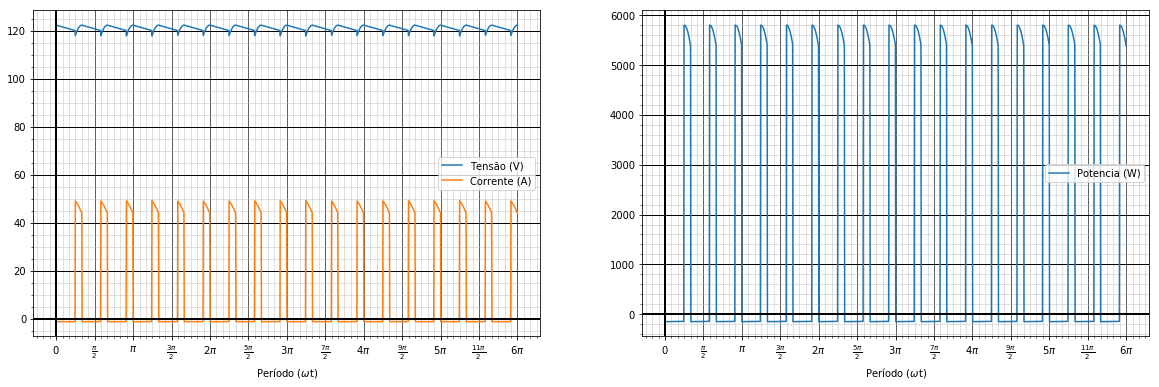

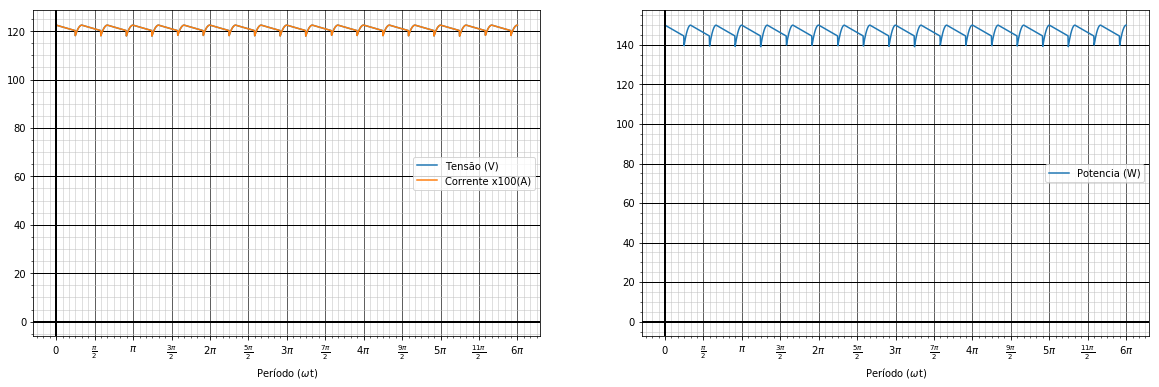

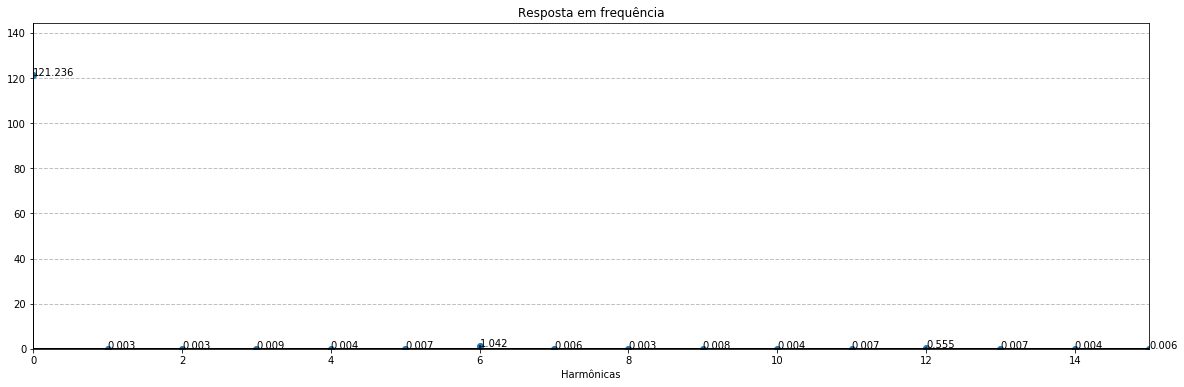

In [11]:
############# RETIFICADOR TRIFÁSICO ONDA COMPLETA #############
########################### CARGA RC ##########################

V_pk = 50*sqrt(2) # tensão de pico de uma fase
R = 100
C = 1100e-6

Freq = 60
w = 2*pi*Freq
T = 2*pi

XC = 1 / (w * C)
XRC = complex(R,-XC)

Z = abs(XRC)

teta = - atan(-w*R*C) #(r, phi) = polar(z)

tal = 1 / (R * C)

# Tensões de fase
Va = f'{V_pk}*sin(x)'
Vb = f'{V_pk}*sin(x - {2*pi/3})'
Vc = f'{V_pk}*sin(x - {4*pi/3})'

# Tensões de linha
Vab = f'({Va} - {Vb})'
Vac = f'({Va} - {Vc})'
Vbc = f'({Vb} - {Vc})'
Vba = f'({Vb} - {Va})'
Vca = f'({Vc} - {Va})'
Vcb = f'({Vc} - {Vb})'

# Encontrando ângulo alpha onde descarga do capacitor atinge valor
# da tensão de linha
teta = pi/2
ab = calculo_ab(f'sin({teta}+x)*exp(-({2*pi/3}+x-{teta})/{w*R*C}) - sin({2*pi/3}+x)', pi/4, 'numpy')
a = abs(ab[0])
print(a)

# Intervalos para degraus
# [(30+a):60, 60:(90+a), (90+a):120, 120:(150+a), (150+a):180, 180:(210+a), (210+a):240, 240:(270+a), ...
#.                                                  ... (270+a):300, 300:(330+a), (330+a):360, 0:(30+a)]
deg = [degrau((pi/6)+a,pi/3), degrau(pi/3,(pi/2)+a), degrau((pi/2)+a,2*pi/3), degrau(2*pi/3,5*pi/6+a), degrau(5*pi/6+a,pi), degrau(pi,7*pi/6+a), degrau(7*pi/6+a,4*pi/3), degrau(4*pi/3,3*pi/2+a), degrau(3*pi/2+a,5*pi/3), degrau(5*pi/3,11*pi/6+a), degrau(11*pi/6+a,2*pi), degrau(0-eps,pi/6+a)]

# Tensao de saída
func_vout = f'{Vab}*{deg[0]} + {V_pk*sqrt(3)}*exp(-(x-{pi/3})/({w*R*C}))*{deg[1]}' #{rampa_RC(V_pk*sqrt(3), teta, w*R*C, 0)}*{deg[1]}'
func_vout = f'{func_vout} + {Vac}*{deg[2]} + {V_pk*sqrt(3)}*exp(-(x-{2*pi/3})/({w*R*C}))*{deg[3]}'
func_vout = f'{func_vout} + {Vbc}*{deg[4]} + {V_pk*sqrt(3)}*exp(-(x-{pi})/({w*R*C}))*{deg[5]}'
func_vout = f'{func_vout} + {Vba}*{deg[6]} + {V_pk*sqrt(3)}*exp(-(x-{4*pi/3})/({w*R*C}))*{deg[7]}'
func_vout = f'{func_vout} + {Vca}*{deg[8]} + {V_pk*sqrt(3)}*exp(-(x-{5*pi/3})/({w*R*C}))*{deg[9]}'
func_vout = f'{func_vout} + {Vcb}*{deg[10]} + {V_pk*sqrt(3)}*exp(-(x-{0})/({w*R*C}))*{deg[11]}'
func_vout = f'({func_vout})'
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

# Corrente no resistor
func_ir = f'({func_vout}/{R})'
Ir_media = calculo_medio(func_ir)
Ir_rms = calculo_rms(func_ir)
Ir_pk = calculo_pk(func_ir)

# Corrente no capacitor
func_ic = f'{w*C*V_pk*sqrt(3)}*(cos(x-{pi/6})*{deg[0]} + cos(x-{pi/2})*{deg[2]})'
func_ic = f'{func_ic} + {w*C*V_pk*sqrt(3)}*(cos(x-{5*pi/6})*{deg[4]} + cos(x-{7*pi/6})*{deg[6]})'
func_ic = f'{func_ic} + {w*C*V_pk*sqrt(3)}*(cos(x-{3*pi/2})*{deg[8]} + cos(x-{11*pi/6})*{deg[10]})'
func_ic = f'{func_ic} - {(V_pk*sqrt(3)/R)}*exp(-(x-{pi/3})/({w*R*C}))*{deg[1]}'
func_ic = f'{func_ic} - {(V_pk*sqrt(3)/R)}*exp(-(x-{2*pi/3})/({w*R*C}))*{deg[3]}'
func_ic = f'{func_ic} - {(V_pk*sqrt(3)/R)}*exp(-(x-{pi})/({w*R*C}))*{deg[5]}'
func_ic = f'{func_ic} - {(V_pk*sqrt(3)/R)}*exp(-(x-{4*pi/3})/({w*R*C}))*{deg[7]}'
func_ic = f'{func_ic} - {(V_pk*sqrt(3)/R)}*exp(-(x-{5*pi/3})/({w*R*C}))*{deg[9]}'
func_ic = f'({func_ic} - {(V_pk*sqrt(3)/R)}*exp(-(x-{0})/({w*R*C}))*{deg[11]})'
Ic_media = calculo_medio(func_ic)
Ic_rms = calculo_rms(func_ic)
Ic_pk = calculo_pk(func_ic)

# Corrente de saída
func_iout = f'({func_ir} + {func_ic})'
Iout_media = calculo_medio(func_iout)
Iout_rms = calculo_rms(func_iout)
I_pk = calculo_pk(func_iout)

# Tensão de entrada de uma fase
func_vin = f'{V_pk}*sin(x)'
Vin_media = calculo_medio(func_vin)
Vin_rms = calculo_rms(func_vin)

# Corrente de entrada de uma fase
a = pi/6
b = 5*pi/6
func_iin = f'{func_iout}*({degrau(a,b)} - {degrau(a+pi,b+pi)})'
Iin_media = calculo_medio(func_iin)
Iin_rms = calculo_rms(func_iin)

# Potencia ativa e aparente da entrada (Trifásicas)
func_p = f'(3*{func_vin}*{func_iin})'
P = calculo_medio(func_p)
S = 3*Iin_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na fase - #"      , "\nIpk: \t", I_pk , "\nIm: \t"  , Iin_media , "\nIrms: \t", Iin_rms)
print("# - Corrente no resistor - #"  , "\nIpk: \t", Ir_pk  , "\nIm: \t"  , Ir_media  , "\nIrms: \t", Ir_rms)
print("# - Corrente no capacitor - #" , "\nIpk: \t", Ic_pk  , "\nIm: \t"  , Ic_media  , "\nIrms: \t", Ic_rms)
print("# - Corrente de saída - #"     , "\nIpk: \t", I_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)

print("# - Potências trifásicas - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P         , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV      , "\nTHD I:\t", thdI)

plot_info(func_vin, func_iin, xlim=(0, T))
plot_info(func_vout, func_iout, xlim=(0, T))
plot_info(func_vout, func_ic, xlim=(0, T))
plot_info(func_vout, func_ir, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_vout, ax2, T=2*np.pi, n_harmonicas = 15)

###### 